In [1]:

from datetime import datetime, timedelta
from datetime import timedelta, date
from calendar import monthrange
from ast import Dict
import matplotlib.pyplot as plt
import xarray as xr
import cdsapi
import utils


In [2]:

start_dt = date(2019,4, 16)
end_dt = date(2019, 10, 28)

#Function that returns a the days between two dates (the inicial date and the las date)
def date_range(date_min, date_max):
    #GWe generate a for to iterate through the correct range of dates.
    for difference_between_dates in range(int ((date_max - date_min).days)+1):
        #Use yield to return the dates given by the difference starting at date_min and ending at date_max
        yield date_min + timedelta(difference_between_dates)


#Create the list for the data(year,month,day,hour)
year_list=[]
month_list=[]
day_list=[]
hour_list=[]

#En este for se generan las listas
for dt in date_range(start_dt, end_dt):
    year_list.append((dt.strftime("%Y")))
    month_list.append((dt.strftime("%m")))
    day_list.append((dt.strftime("%d")))
    hour_list.append((dt.strftime("%H:%M")))
#Lists corresponding to the api data sorted and correctly formatted
    
list_year=(','.join(sorted(set(year_list))))
list_month=(','.join(sorted(set(month_list))))
list_day=(','.join(sorted(set(day_list))))
list_hour=(','.join(sorted(set(hour_list))))

In [3]:
end_dt = date(2019, 10, 28)

#Function that returns a the days between two dates (the inicial date and the las date)
def date_range(date_min, date_max):
    #GWe generate a for to iterate through the correct range of dates.
    for difference_between_dates in range(int ((date_max - date_min).days)+1):
        #Use yield to return the dates given by the difference starting at date_min and ending at date_max
        yield date_min + timedelta(difference_between_dates)


#Create the list for the data(year,month,day,hour)
year_list=[]
month_list=[]
day_list=[]
hour_list=[]

#En este for se generan las listas
for dt in date_range(start_dt, end_dt):
    year_list.append((dt.strftime("%Y")))
    month_list.append((dt.strftime("%m")))
    day_list.append((dt.strftime("%d")))
    hour_list.append((dt.strftime("%H:%M")))
#Lists corresponding to the api data sorted and correctly formatted
    
list_year=(','.join(sorted(set(year_list))))
list_month=(','.join(sorted(set(month_list))))
list_day=(','.join(sorted(set(day_list))))
list_hour=(','.join(sorted(set(hour_list))))

In [4]:

#url: https://cds.climate.copernicus.eu/api/v2
#key: 159276:b225e1d7-1242-4152-8576-ce50852fbd4e

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'soil_temperature_level_1', 'total_precipitation',
        ],
        'year': sorted(set(year_list))
        ,
        'month': sorted(set(month_list))
        ,
        'day': sorted(set(day_list))
        ,
        'time': [
            '17:00', 
            #13
        ],
        'area': [
            
            38.1445082027146, -97.72654627101196, 38.142173460759004,
            -97.72096882266754,
        ],
        'format': 'netcdf',
    },
    'download.nc')

2022-11-01 23:59:53,021 INFO Welcome to the CDS
2022-11-01 23:59:53,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-11-01 23:59:53,262 INFO Request is completed
2022-11-01 23:59:53,264 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/adaptor.mars.internal-1667334726.1452527-29236-6-b3402a1d-c374-4275-87f5-5fca7a1eacf1.nc to download.nc (3K)
2022-11-01 23:59:54,125 INFO Download rate 3.5K/s


Result(content_length=3084,content_type=application/x-netcdf,location=https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/adaptor.mars.internal-1667334726.1452527-29236-6-b3402a1d-c374-4275-87f5-5fca7a1eacf1.nc)

In [5]:

#Abrimos la informacion
data_tp=xr.open_dataset('download.nc')

In [6]:



def data_extrator_temp(
    data_tp,
) -> Dict:
    year_2019 = {}
    year = 2019
    # Temperature.
    temperature = data_tp['stl1'].values.ravel()
    # Precipitation.
    precipitation = data_tp['tp'].values.ravel()

    # Ordered month.
    months = list(set([x.to_pydatetime().month for x  in data_tp['time'].to_series()]))

    #Iteration to aggregate the corresponding values per month(day and temp values are added),
    for month in sorted(months):
        #number of days in a month,
        month_range = monthrange(year, month)[1]

        #Generate days in the month.
        days = [x + 1 for x in range(month_range)]

        # number of temperature and precipitation data per day ().
        n_data= len(set([x.to_pydatetime().hour for x  in data_tp['time'].to_series()]))


        month_temp = {}

        # Get the temp
        for day in days:

            #gives the value for temperature and precipitation per hour.
            values_per_hour = {'temperature' : temperature[0:n_data], 'precipitation' : precipitation[0:n_data]}

            #Take the corresponding values per day for temperature and precipitation.
            temperature = temperature[n_data:]
            precipitation = precipitation[n_data:]

            #Updates the dictionary and adds the previously calculated values.
            month_temp.update(
            {day : values_per_hour}
            )
        #adds the information of months, days and their temperature and precipitation data  to the main dictionary.
        year_2019.update({
            month : month_temp
        })
    return year_2019

In [7]:
K2019MVfeatures = data_extrator_temp(data_tp = data_tp)
for i in range(4,len(K2019MVfeatures)):
    for j in range(1,len(K2019MVfeatures[i])):
        print(K2019MVfeatures[i][j]['precipitation'])

[1.1641532e-10]
[1.1641532e-10]
[2.3234985e-05]
[9.801972e-05]
[1.1641532e-10]
[1.9533094e-05]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[3.6230776e-06]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[8.2701445e-07]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.9697472e-07]
[1.3153418e-05]
[1.1641532e-10]
[0.00012925]
[4.3329783e-07]
[2.0872103e-06]
[0.0001096]
[0.00017659]
[0.00258076]
[5.0250324e-05]
[1.1641532e-10]
[0.00016895]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[0.00113028]
[1.1641532e-10]
[0.00096098]
[3.0008494e-05]
[1.1641532e-10]
[0.00159958]
[0.00050207]
[0.00016453]
[0.00045568]
[6.111956e-05]
[0.00096472]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[2.3313682e-05]
[1.1641532e-10]
[1.1641532e-10]
[1.1641532e-10]
[6.62785e-05]
[

In [8]:

year="2019"
IMGS_PATH = ('D:\VSCode\Repositorios\Plant-Growth-Cycle-based-on-geospatial-data-1\DataExtraction\DataBase\Kansas-'+year)
band_labels = ["B4", "B3", "B2", "B8"]
images = utils.load_landsat_image(IMGS_PATH, band_labels)
img_keys = list(images.keys())
days, timestamps_list, hours_list = utils.images_time_info(img_keys)


In [9]:
xs = []
prueba = timestamps_list[0]
print(prueba)
month,day = prueba.month, prueba.day
x=float(K2019MVfeatures[month][day]['temperature'])
xs.append(x)
xs

2019-04-05 17:08:49


[288.29339599609375]

[Timestamp('2019-04-05 17:08:49'),
 Timestamp('2019-04-08 17:18:59'),
 Timestamp('2019-04-15 17:08:59'),
 Timestamp('2019-04-18 17:18:59'),
 Timestamp('2019-04-20 17:08:51'),
 Timestamp('2019-04-25 17:08:59'),
 Timestamp('2019-04-28 17:19:09'),
 Timestamp('2019-05-05 17:08:59'),
 Timestamp('2019-05-13 17:19:01'),
 Timestamp('2019-05-15 17:08:59'),
 Timestamp('2019-05-30 17:08:51'),
 Timestamp('2019-06-02 17:19:01'),
 Timestamp('2019-06-04 17:08:59'),
 Timestamp('2019-06-07 17:19:09'),
 Timestamp('2019-06-12 17:19:01'),
 Timestamp('2019-06-14 17:08:59'),
 Timestamp('2019-06-17 17:19:09'),
 Timestamp('2019-06-24 17:08:59'),
 Timestamp('2019-06-27 17:19:09'),
 Timestamp('2019-06-29 17:09:01'),
 Timestamp('2019-07-02 17:19:01'),
 Timestamp('2019-07-07 17:19:09'),
 Timestamp('2019-07-09 17:09:01'),
 Timestamp('2019-07-12 17:19:01'),
 Timestamp('2019-07-14 17:08:59'),
 Timestamp('2019-07-17 17:19:09'),
 Timestamp('2019-07-19 17:09:01'),
 Timestamp('2019-07-22 17:19:01'),
 Timestamp('2019-07-

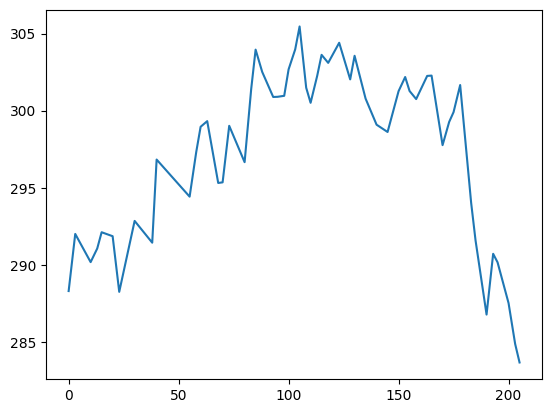

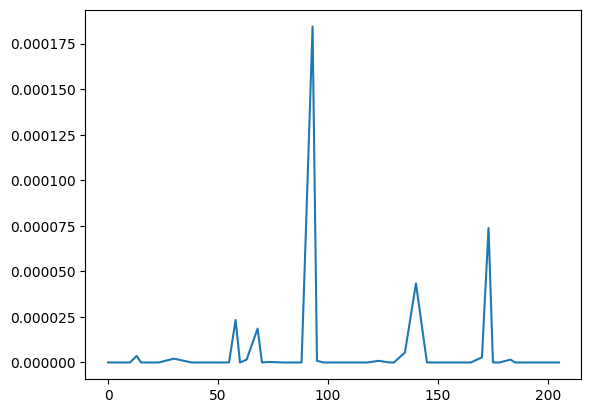

In [19]:
from typing import List, Tuple
#K2019MVfeatures 

def get_temp_and_preci(
    dict_from_temp_extractor: Dict,
    timestamps_list : List
) -> Tuple[List[float],List[float]]:
    """
    Retrieves values of temperature and precipitation according to the timestamps of
    our original images from dictionary obtained by the API.
    """
    # Lists of precipitation and temperature.    
    preci = []
    temp = []
    
    # Iterate over the timestamps list.
    for timestamp in timestamps_list:
        try:
            # Keys obtained to search in dict.
            month,day = timestamp.month, timestamp.day
            # Searches for data in dict.
            t_data = float(dict_from_temp_extractor[month][day]['temperature'])
            p_data = float(dict_from_temp_extractor[month][day]['precipitation'])
            # Adds to lists.
            temp.append(t_data)
            preci.append(p_data)
        
        except:
            break
    return temp, preci
temp, preci = get_temp_and_preci(K2019MVfeatures,timestamps_list)
plt.plot(days,temp)
plt.figure()
plt.plot(days,preci)
type(timestamps_list[0])
timestamps_list

In [11]:
preci

[1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 3.6230776458978653e-06,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 2.0872103050351143e-06,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 2.3313681595027447e-05,
 1.1641532182693481e-10,
 1.535983756184578e-06,
 1.8587918020784855e-05,
 1.1641532182693481e-10,
 2.757878974080086e-07,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 0.00018438254483044147,
 9.058276191353798e-07,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 9.058276191353798e-07,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 5.513429641723633e-06,
 4.335865378379822e-05,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.1641532182693481e-10,
 1.164

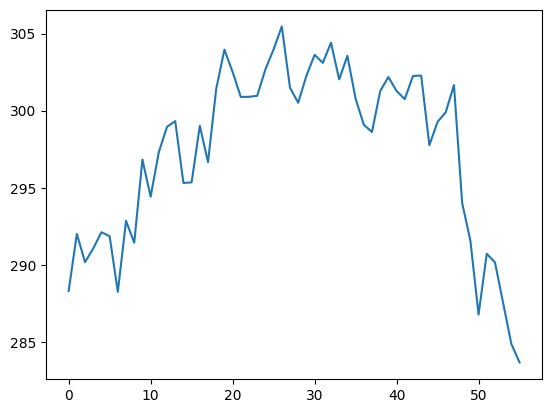

In [12]:

import matplotlib.pyplot as plt
plt.plot(temp)